In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imutils import contours
import imutils
from PIL import Image

In [35]:
image = cv.imread('./image/scan_image_1.jpg')
image = imutils.resize(image, width=1000)
image_copy = image.copy()
# image_re = np.zeros(image_copy.shape, np.uint8)
image_re = np.full(image_copy.shape, 255, np.uint8)
# image2 = cv2.resize(image, (300, 192))
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#cv.imshow('imgae_re', cv.resize(image_re, None, fx=0.3, fy=0.3))
#cv.imshow('imgae_re', image_re)

#cv.waitKey(0)
#cv.destroyAllWindows()

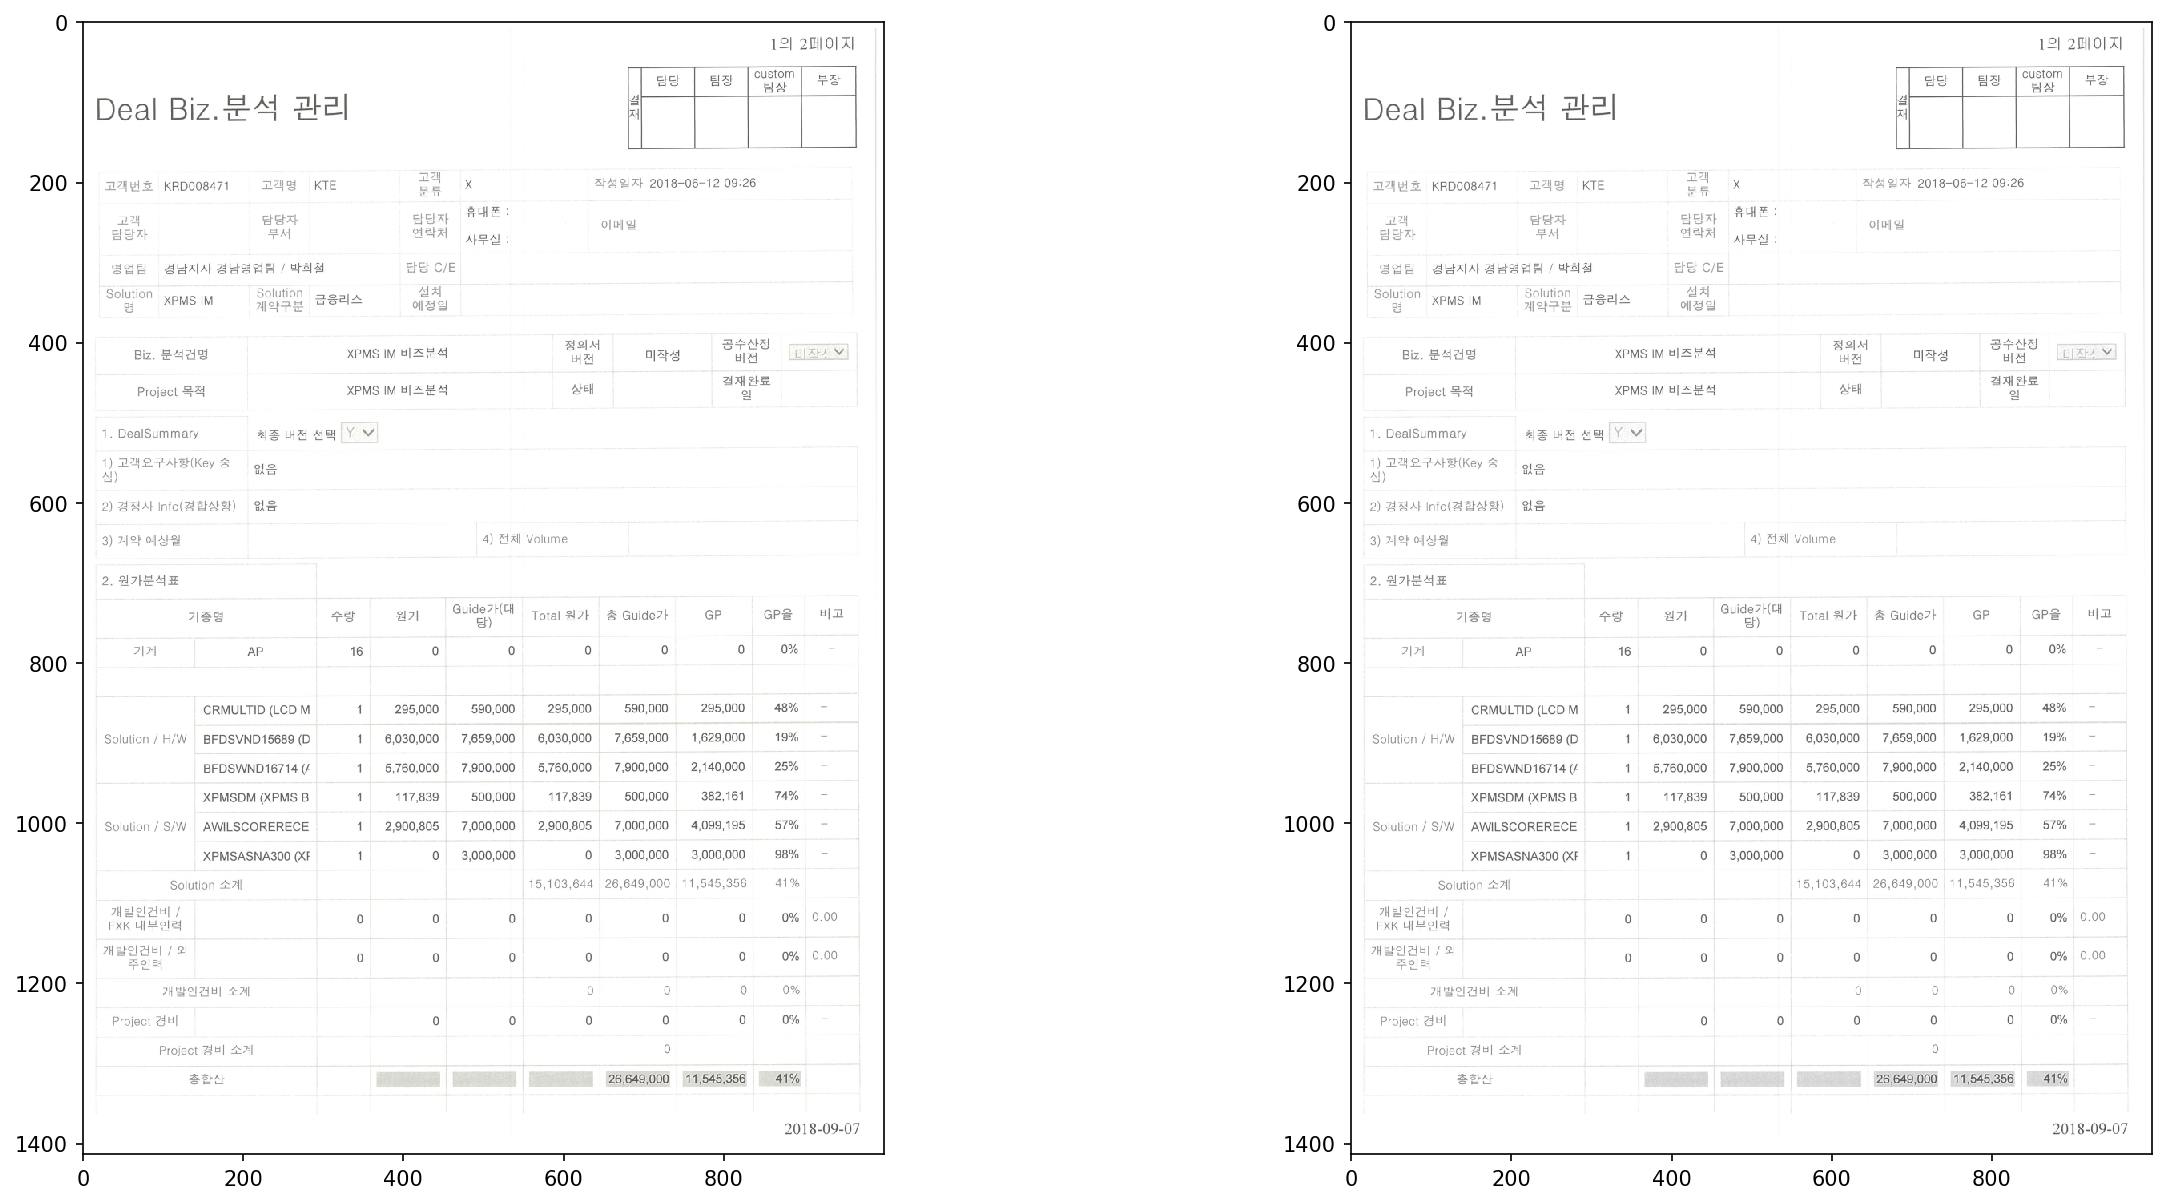

In [36]:
# Plot
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

plt.show()

In [37]:
rectKernel = cv.getStructuringElement(cv.MORPH_RECT, (20, 3))  # 직사각형 커널
sqKernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))   # 정사각형 커널

In [38]:
tophat = cv.morphologyEx(gray, cv.MORPH_TOPHAT, rectKernel)

In [39]:
# compute the Scharr gradient of the tophat image, then scale
# the rest back into the range [0, 255]
# 소벨을 통해 엣지 검출 (하기 이미지 참조)
gradX = cv.Sobel(tophat, ddepth=cv.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
gradY = cv.Sobel(tophat, ddepth=cv.CV_32F, dx=0, dy=1, ksize=-1)
gradY = np.absolute(gradY)

(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype('uint8')
cv.imshow('gradX_x', gradX)

(minVal, maxVal) = (np.min(gradY), np.max(gradY))
gradY = (255 * ((gradY - minVal) / (maxVal - minVal)))
gradY = gradY.astype('uint8')
cv.imshow('gradY_y', gradY)

cv.waitKey(0)
cv.destroyAllWindows()

In [40]:
# apply a closing operation using the rectangular kernel to help
# close gaps in between credit card number digits, then apply
# Otsu's thresholding method to binarize the image
gradX_ = cv.morphologyEx(gradX, cv.MORPH_CLOSE, rectKernel)
thresh = cv.threshold(gradX_, 0 , 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

# apply a second closing operation to the binary image, again
# to help close gaps between credit card number regions
thresh1 = cv.morphologyEx(thresh, cv.MORPH_CLOSE, sqKernel)

cv.imshow('gradX', gradX)
cv.imshow('thresh1', thresh1)

cv.waitKey(0)
cv.destroyAllWindows()
'''
# Plot
plt.figure(figsize=(20, 10), dpi=150) 
plt.subplot(1, 3, 1)
plt.imshow(gradX, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)

plt.show()
'''


"\n# Plot\nplt.figure(figsize=(20, 10), dpi=150) \nplt.subplot(1, 3, 1)\nplt.imshow(gradX, cmap='gray', vmin=0, vmax=255)\n\nplt.subplot(1, 3, 2)\nplt.imshow(thresh, cmap='gray', vmin=0, vmax=255)\n\nplt.subplot(1, 3, 3)\nplt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)\n\nplt.show()\n"

In [41]:
# find contours in the thresholded image, then initialize the list of diti locations
cnts = cv.findContours(thresh1.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
locs = []

In [42]:
for (i, c) in enumerate(cnts):
    # compute the bounding box of the contour, then use the bounding box coordinates to derive the aspect ratio
    (x, y, w, h) = cv.boundingRect(c)
    
    if h > 10.0:
        locs.append((x, y ,w, h))
        #img_rec = cv.rectangle(image_copy, (x-5, y-5), (x+w+5, y+h+5), (0, 255, 0), 2)
        img_rec = cv.rectangle(image_copy, (x-2, y-2), (x+w+2, y+h+2), (0, 255, 0), 2)
        print(locs)
# plt.imshow(img_rec, cmap='gray', vmin=0, vmax=255)

[(879, 1375, 93, 15)]
[(879, 1375, 93, 15), (658, 1315, 76, 13)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868, 1314, 29, 11)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868, 1314, 29, 11), (757, 1314, 73, 13)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868, 1314, 29, 11), (757, 1314, 73, 13), (135, 1314, 42, 13)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868, 1314, 29, 11), (757, 1314, 73, 13), (135, 1314, 42, 13), (97, 1278, 118, 13)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868, 1314, 29, 11), (757, 1314, 73, 13), (135, 1314, 42, 13), (97, 1278, 118, 13), (39, 1241, 78, 14)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868, 1314, 29, 11), (757, 1314, 73, 13), (135, 1314, 42, 13), (97, 1278, 118, 13), (39, 1241, 78, 14), (875, 1240, 22, 12)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868, 1314, 29, 11), (757, 1314, 73, 13), (135, 1314, 42, 13), (97, 1278, 118, 13), (39, 1241, 78, 14), (875, 1240, 22, 12), (102, 1205, 108, 12)]
[(879, 1375, 93, 15), (658, 1315, 76, 13), (868,

In [43]:
locs[:6]

[(879, 1375, 93, 15),
 (658, 1315, 76, 13),
 (868, 1314, 29, 11),
 (757, 1314, 73, 13),
 (135, 1314, 42, 13),
 (97, 1278, 118, 13)]

In [47]:
for i in range(len(locs)):  # len(locs)
    x, y, w, h = locs[i]
    region = image[y-3:y+h+1, x-5:x+w+1]
    image_re[y-3:y+h+1, x-5:x+w+1] = region
    #print('{}번째'.format(i))
    #cv.imshow('region', region)
    #cv.waitKey()
    #cv.destroyAllWindows()

In [48]:
# cv.imshow('image_re', image_re)
cv.imwrite('./image/image_re.jpg', image_re)
cv.imshow('img_rec', cv.resize(img_rec, None, fx=0.5, fy=0.5))
# cv.imshow('image_re', cv.resize(image_re, None, fx=0.5, fy=0.5)) 
cv.imshow('image_re', image_re)
cv.waitKey()
cv.destroyAllWindows()

# OCR

In [49]:
# import the necessary packages
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
import argparse
import cv2
import os

In [50]:
print(pytesseract.image_to_string(Image.open('./image/image_re.jpg'), lang='kor+eng'))

Deal Biz. 2A 관리

 

12) 2페이지

 

custom] 부장
팀장      2s

 

 

 

 

 

 

 

 

이메일

미작성

총 Guide7t

590,000
7,659,000
7,900,000

500,000
7,000,000
3,000,000

26,649,000

고객번호 KRDOO8471        BAS KTE                            x                           작성
고객                   담당자                  담당자 FAE
담당자          부서          연락처 yay»
영업팀 경남지사 경남영업팀 / 박희철      담당 C/E
Solution                Solution sea)a         설치
명 ㆍ CARMEN   계약구분 BSS    예정일
정의서
Biz, 분석건명                      XPMS IM 비즈분석                    세
Project 목적                        XPMS IM 비즈분석                     상태
1. DealSummary      최종 버전 선택” Vv
1] 고객요구사함0<0/ 중: 없음
)
2) 경쟁사 1010(경합상황) 없음
3) 계약 예상월                      4) 전체 Volume
2. 원가분석표
기종명                 수량 원가  94맵간때 7661원가
기계                AP                16
CRMULTID (LCD M         1      295,000      590,000      295,000
Solution / H/W BFDSVND15689 (D        1    6,030,000    7,659,000    6,030,000
BFDSWND16714 (¢         1    5,760,000    7,900,000   

In [20]:
print(pytesseract.image_to_string(Image.open('./image/scan_image_1.jpg'), lang='kor+eng'))

:   HAJ 고  |
Deal Biz. 분석 관르
고객번호 KRDOO8471  고객명 KTE
고객          담당자
담당자          부서
영업팀 경남지사 경남영업팀 / 박희철

Solution                 Solution _ -ㅎ=

명    XPMS IM      계약구분  금융리츠
612. 분석건명

Project 목적

1. DealSummary         최종 버전 MEW Y

2. 원가분석표

기종명                   수량
기계                AP               16
CRMULTID (LCD M         1
Solution / H/W | BFDSVND15689 (D        1
BFDSWND16714 (4         1
XPMSDM (XPMS B          1
Solution / S/W > AWILSCORERECE       1
XPMSASNA300 (자         1
Solution 소계
개발인건비 /

FXK 내부인력              °

개발인건비 / 외
주인력               o

Project 경비
Project 경비 소계

총합산

고객

ae IX
174"

담당      휴대폰
uno

연락처 ｜시무실
담당 C/E

설치

예정일

XPMS IM 비즈분

XPMS IM 비즈분석

원가

295,000
6,030,000
5,760,000

117,839
2,900,805

0

Ad
석

4) 전체 Volume

64106가(대
당)

590,000
7,659,000
7,900,000

500,000
7,000,000

3,000,000

12) 2페이지

 

 

 

 

 

 

 

 

 

담당 | 팀장 [COR aa
결
재
Atal Qi Xt 2018-06-12 09:26
이메일
정의ㅅ          공수산정
A      미작성       버전     메자
Total 원가 총 64106가   GP   GPe Ala

In [53]:
image_re

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]